# NAME : M S SAI TEJA
# ROLL NO.: ME21B171

# Task-1
Given the classification problem having 8-features, 3-classes, I have to model the following algorithms:
1. Decision Tree(Categorical features)
2. Decision Tree(Categorical features in one-hot encoded form)
3. Logistic Regression with L1 regularization
4. K-Nearest Neighbors

In order to these, I have to implement the baseline model of Logistic Regression classification, Support Vector Classification, Neural Network classification, XGBoost classification, and random forest classification.

Also, the performance on the test-data to be reported, and creating a visualization of these 9 methods, showing the mean and variance of their accuracies.

In [1]:
# Import necessary libraries
import pandas as pd  # Data manipulation and analysis
import numpy as np  # Numerical computations

# Import machine learning libraries
from sklearn.model_selection import train_test_split  # Split data into train and test sets
from sklearn.tree import DecisionTreeClassifier  # Decision Tree classification algorithm
from sklearn.preprocessing import OneHotEncoder  # One-hot encoding for categorical features
from sklearn.linear_model import LogisticRegression  # Logistic Regression algorithm
from sklearn.neighbors import KNeighborsClassifier  # k-Nearest Neighbors classification algorithm
from sklearn.metrics import accuracy_score

In [3]:
# Load nursery dataset from CSV file
nursery_file_path = '/content/nursery.data'

# Define function to load data
def load_data(file_path, delimiter=',', header=None):
    """Load dataset from CSV file."""
    try:
        data = pd.read_csv(file_path, delimiter=delimiter, header=header)
        return data
    except Exception as e:
        print(f"Error loading data: {e}")

# Load nursery data
nursery = load_data(nursery_file_path)

# Display first few rows of the dataset
print("Nursery Dataset Preview:")
print(nursery.head())


Nursery Dataset Preview:
       0       1         2  3           4           5              6  \
0  usual  proper  complete  1  convenient  convenient        nonprob   
1  usual  proper  complete  1  convenient  convenient        nonprob   
2  usual  proper  complete  1  convenient  convenient        nonprob   
3  usual  proper  complete  1  convenient  convenient  slightly_prob   
4  usual  proper  complete  1  convenient  convenient  slightly_prob   

             7          8  
0  recommended  recommend  
1     priority   priority  
2    not_recom  not_recom  
3  recommended  recommend  
4     priority   priority  


# Data Preprocessing

In [4]:
# Define features and target
X = nursery.iloc[:, :8]  # Features
y = nursery.iloc[:, 8]   # Target

# Apply label encoding to categorical variables
from sklearn.preprocessing import LabelEncoder

def encode_categorical_data(data):
    """Encode categorical data using LabelEncoder."""
    le = LabelEncoder()
    return le.fit_transform(data)


# Encode each column with categorical data
for col in X.columns:
    X[col] = encode_categorical_data(X[col])

# Encode the target column
y = encode_categorical_data(y)

<ipython-input-4-55820faff0fd>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col] = encode_categorical_data(X[col])
<ipython-input-4-55820faff0fd>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col] = encode_categorical_data(X[col])
<ipython-input-4-55820faff0fd>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/u

# 1. Decision Trees (Categorical Features)

In [5]:
# Define function to evaluate Decision Tree performance with varying max depths
def evaluate_decision_tree_performance(X, y, num_iterations=5):
    """Evaluate Decision Tree performance with varying max depths."""
    decision_trees_accuracies = []

    for _ in range(num_iterations):
        # Split data into train, validation, and test sets
        X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3)
        X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5)

        # Define hyperparameter tuning space
        depth_range = range(1, 25)

        # Initialize lists to store validation accuracy and depth
        val_accuracies = []

        # Perform hyperparameter tuning
        for depth in depth_range:
            dt_classifier = DecisionTreeClassifier(max_depth=depth, random_state=42)
            dt_classifier.fit(X_train, y_train)
            y_val_pred = dt_classifier.predict(X_val)
            val_accuracy = accuracy_score(y_val, y_val_pred)
            val_accuracies.append(val_accuracy)

        # Train final model using best hyperparameters
        best_depth = depth_range[val_accuracies.index(max(val_accuracies))]
        final_model = DecisionTreeClassifier(max_depth=best_depth, random_state=42)
        final_model.fit(X_train, y_train)

        # Evaluate final model on test set
        y_test_pred = final_model.predict(X_test)
        test_accuracy = accuracy_score(y_test, y_test_pred)

        decision_trees_accuracies.append(test_accuracy)

    return decision_trees_accuracies

In [6]:
# Evaluate Decision Tree performance
decision_trees_accuracies = evaluate_decision_tree_performance(X, y)

# Print results
print("Accuracies of Decision Tree Classifier:", decision_trees_accuracies)
print("Mean Accuracy:", np.mean(decision_trees_accuracies))
print("Standard Deviation:", np.std(decision_trees_accuracies)) # To have idea how distributed the values of accuracies are

Accuracies of Decision Tree Classifier: [0.9922839506172839, 0.9897119341563786, 0.9969135802469136, 0.9938271604938271, 0.9917695473251029]
Mean Accuracy: 0.9929012345679012
Standard Deviation: 0.0023995686810062903


# Decision Tree (categorical features in one-hot encoded form)

In [7]:
# One-Hot Encoding for the feature columns
X_encoded = pd.get_dummies(X, drop_first=True)

# Define function to evaluate Decision Tree performance with one-hot encoded features
def evaluate_decision_tree_one_hot(X_encoded, y, num_iterations=5):
    """Evaluate Decision Tree performance with one-hot encoded features."""
    decision_trees_one_hot_accuracies = []

    for _ in range(num_iterations):
        # Split data into train, validation, and test sets
        X_train, X_temp, y_train, y_temp = train_test_split(X_encoded, y, test_size=0.3)
        X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5)

        # Define hyperparameter tuning space
        depth_range = range(1, 25)
        val_accuracies = []

        # Perform hyperparameter tuning
        for depth in depth_range:
            dt_classifier = DecisionTreeClassifier(max_depth=depth, random_state=42)
            dt_classifier.fit(X_train, y_train)
            y_val_pred = dt_classifier.predict(X_val)
            val_accuracy = accuracy_score(y_val, y_val_pred)
            val_accuracies.append(val_accuracy)

        # Train final model using best hyperparameters
        best_depth = depth_range[val_accuracies.index(max(val_accuracies))]
        final_model = DecisionTreeClassifier(max_depth=best_depth, random_state=42)
        final_model.fit(X_train, y_train)

        # Evaluate final model on test set
        y_test_pred = final_model.predict(X_test)
        test_accuracy = accuracy_score(y_test, y_test_pred)

        decision_trees_one_hot_accuracies.append(test_accuracy)

    return decision_trees_one_hot_accuracies

In [8]:
# Evaluate Decision Tree performance with one-hot encoded features
decision_trees_one_hot_accuracies = evaluate_decision_tree_one_hot(X_encoded, y)

# Print results
print("Accuracies of Decision Tree (categorical features in one-hot encoded form):")
print(decision_trees_one_hot_accuracies)
print("Mean Accuracy:", np.mean(decision_trees_one_hot_accuracies))
print("Standard Deviation:", np.std(decision_trees_one_hot_accuracies)) # To have idea how distributed the values of accuracies are

Accuracies of Decision Tree (categorical features in one-hot encoded form):
[0.9912551440329218, 0.9881687242798354, 0.9938271604938271, 0.9933127572016461, 0.992798353909465]
Mean Accuracy: 0.9918724279835391
Standard Deviation: 0.0020421227614484854


# Logistic Regression with L1 regularizaton

In [9]:
# Define function to evaluate Logistic Regression with L1 regularization
def evaluate_logistic_regression_l1(X_encoded, y, num_iterations=5):
    """
    Evaluate Logistic Regression with L1 regularization.

    Parameters:
    X_encoded (array-like): One-hot encoded feature data.
    y (array-like): Target data.
    num_iterations (int, optional): Number of iterations. Defaults to 5.

    Returns:
    list: List of test accuracies for each iteration.
    """
    logistic_l1_accuracies = []
    lambda_values = [0.001, 0.01, 0.1, 1, 10, 100, 1000]

    for _ in range(num_iterations):
        # Split data into train, validation, and test sets
        X_train, X_temp, y_train, y_temp = train_test_split(X_encoded, y, test_size=0.3)
        X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5)

        # Perform hyperparameter tuning
        val_accuracies = []
        for lambda_value in lambda_values:
            model = LogisticRegression(penalty='l1', solver='saga', C=1/lambda_value, max_iter=1000)
            model.fit(X_train, y_train)
            y_val_pred = model.predict(X_val)
            val_accuracies.append(accuracy_score(y_val, y_val_pred))

        # Train final model using best hyperparameters
        best_lambda = lambda_values[np.argmax(val_accuracies)]
        final_model = LogisticRegression(penalty='l1', solver='saga', C=1/best_lambda, max_iter=1000)
        final_model.fit(X_train, y_train)

        # Evaluate final model on test set
        logistic_l1_accuracies.append(accuracy_score(y_test, final_model.predict(X_test)))

    return logistic_l1_accuracies

In [10]:
# Evaluate Logistic Regression with L1 regularization
logistic_l1_accuracies = evaluate_logistic_regression_l1(X_encoded, y)

# Print results
print("Accuracies of Logistic Regression with L1 regularization:", logistic_l1_accuracies)
print("Mean Accuracy:", np.mean(logistic_l1_accuracies))
print("Standard Deviation:", np.std(logistic_l1_accuracies)) # To have idea how distributed the values of accuracies are

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which 

Accuracies of Logistic Regression with L1 regularization: [0.7710905349794238, 0.7782921810699589, 0.772119341563786, 0.7556584362139918, 0.7752057613168725]
Mean Accuracy: 0.7704732510288066
Standard Deviation: 0.007824342939025347


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


# K-Nearest Neighbors

In [11]:
# Define function to evaluate K-Nearest Neighbors performance
def evaluate_knn(X_encoded, y, num_iterations=5):
    """
    Evaluate K-Nearest Neighbors performance.

    Parameters:
    X_encoded (array-like): One-hot encoded feature data.
    y (array-like): Target data.
    num_iterations (int, optional): Number of iterations. Defaults to 5.

    Returns:
    list: List of test accuracies for each iteration.
    """
    knn_accuracies = []
    k_values = range(1, 21)

    for _ in range(num_iterations):
        # Split data into train, validation, and test sets
        X_train, X_temp, y_train, y_temp = train_test_split(X_encoded, y, test_size=0.3)
        X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5)

        # Perform hyperparameter tuning
        accuracies = []
        for k in k_values:
            model = KNeighborsClassifier(n_neighbors=k)
            model.fit(X_train, y_train)
            y_val_pred = model.predict(X_val)
            accuracies.append(accuracy_score(y_val, y_val_pred))

        # Train final model using best hyperparameters
        best_k = k_values[np.argmax(accuracies)]
        best_model = KNeighborsClassifier(n_neighbors=best_k)
        best_model.fit(X_train, y_train)

        # Evaluate final model on test set
        knn_accuracies.append(accuracy_score(y_test, best_model.predict(X_test)))

    return knn_accuracies

In [12]:
# Evaluate K-Nearest Neighbors performance
knn_accuracies = evaluate_knn(X_encoded, y)

# Print results
print("Accuracies for K-Nearest Neighbors:", knn_accuracies)
print("Mean Accuracy:", np.mean(knn_accuracies))
print("Standard Deviation:", np.std(knn_accuracies))

Accuracies for K-Nearest Neighbors: [0.9459876543209876, 0.948045267489712, 0.9465020576131687, 0.9449588477366255, 0.9326131687242798]
Mean Accuracy: 0.9436213991769546
Standard Deviation: 0.0055935297197811686


# XGBoost Classifier

In [13]:
from xgboost import XGBClassifier

In [17]:
# One-Hot Encoding for the feature columns
X_encoded = pd.get_dummies(X, drop_first=True)

# Label encode the target variable ensuring consecutive encoding
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

In [15]:
# Define function to evaluate XGBoost Classifier performance
def evaluate_xgb(X_encoded, y_encoded):
    """
    Evaluate XGBoost Classifier performance.

    Parameters:
    X_encoded (array-like): One-hot encoded feature data.
    y_encoded (array-like): Label-encoded target data.

    Returns:
    list: List of test accuracies.
    """
    xgb_accuracies = []

    for i in range(5):
        # Split the data into train, validation, and test sets
        X_train, X_temp, y_train, y_temp = train_test_split(X_encoded, y_encoded, test_size=0.3)
        X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5)

        # Initialize the XGBoost classifier
        xgb = XGBClassifier()

        # Train the model
        xgb.fit(X_train, y_train)

        # Make predictions on the test set
        y_pred = xgb.predict(X_test)

        # Evaluate the model
        accuracy = accuracy_score(y_test, y_pred)
        xgb_accuracies.append(accuracy)

    return xgb_accuracies


In [18]:
# Evaluate XGBoost Classifier performance
xgb_accuracies = evaluate_xgb(X_encoded, y_encoded)

# Print results
print("Accuracies:", xgb_accuracies)
print("Mean Accuracy:", np.mean(xgb_accuracies))
print("Standard Deviation:", np.std(xgb_accuracies))

Accuracies: [1.0, 1.0, 1.0, 1.0, 0.9984567901234568]
Mean Accuracy: 0.9996913580246913
Standard Deviation: 0.0006172839506172868


# Support Vector Classification

In [19]:
from sklearn.svm import SVC

# Define function to evaluate SVM performance
def evaluate_svm(X_encoded, y_encoded):
    """
    Evaluate SVM performance.

    Parameters:
    X_encoded (array-like): One-hot encoded feature data.
    y_encoded (array-like): Label-encoded target data.

    Returns:
    list: List of test accuracies.
    """
    svm_accuracies = []

    for i in range(5):
        # Split data into train, validation, and test sets
        X_train, X_temp, y_train, y_temp = train_test_split(X_encoded, y_encoded, test_size=0.3)
        X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5)

        # Initialize and train SVM classifier
        svm = SVC(random_state=42)
        svm.fit(X_train, y_train)

        # Make predictions on the test set
        y_pred = svm.predict(X_test)

        # Evaluate the model
        svm_accuracies.append(accuracy_score(y_test, y_pred))

    return svm_accuracies

In [20]:
# Evaluate SVM performance
svm_accuracies = evaluate_svm(X_encoded, y_encoded)

# Print results
print("Accuracies of SVM:", svm_accuracies)
print("Mean Accuracy:", np.mean(svm_accuracies))
print("Standard Deviation:", np.std(svm_accuracies))

Accuracies of SVM: [0.9356995884773662, 0.9454732510288066, 0.940843621399177, 0.9531893004115226, 0.9387860082304527]
Mean Accuracy: 0.9427983539094651
Standard Deviation: 0.00608997884236574


# Random Forest Classification

In [21]:
from sklearn.ensemble import RandomForestClassifier

In [22]:
def evaluate_random_forest(X_encoded, y_encoded):
    """
    Evaluate Random Forest Classifier performance.

    Parameters:
    X_encoded (array-like): One-hot encoded feature data.
    y_encoded (array-like): Label-encoded target data.

    Returns:
    list: List of test accuracies.
    """
    rf_accuracies = []

    for i in range(5):
        X_train, X_temp, y_train, y_temp = train_test_split(X_encoded, y_encoded, test_size=0.3)
        X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5)

        rf = RandomForestClassifier()
        rf.fit(X_train, y_train)
        y_pred = rf.predict(X_test)
        rf_accuracies.append(accuracy_score(y_test, y_pred))

    return rf_accuracies

In [23]:
rf_accuracies = evaluate_random_forest(X_encoded, y_encoded)

print("Accuracies of Random Forest Classifier:", rf_accuracies)
print("Mean Accuracy:", np.mean(rf_accuracies))
print("Standard Deviation:", np.std(rf_accuracies)) # To have idea how distributed the values of accuracies are

Accuracies of Random Forest Classifier: [0.9835390946502057, 0.9866255144032922, 0.977880658436214, 0.9789094650205762, 0.9814814814814815]
Mean Accuracy: 0.9816872427983538
Standard Deviation: 0.003164312036878523


# Neural Network Classification

In [24]:
from sklearn.neural_network import MLPClassifier

In [27]:
def evaluate_neural_network(X_encoded, y_encoded):
    """
    Evaluate Neural Network Classifier performance.

    Parameters:
    X_encoded (array-like): One-hot encoded feature data.
    y_encoded (array-like): Label-encoded target data.

    Returns:
    list: List of test accuracies.
    """
    nn_accuracies = []

    for i in range(5):
        X_train, X_temp, y_train, y_temp = train_test_split(X_encoded, y_encoded, test_size=0.3)
        X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5)

        nn = MLPClassifier(max_iter=250)
        nn.fit(X_train, y_train)
        y_pred = nn.predict(X_test)
        nn_accuracies.append(accuracy_score(y_test, y_pred))

    return nn_accuracies


In [26]:
nn_accuracies = evaluate_neural_network(X_encoded, y_encoded)

print("Accuracies of Neural Network Classifier:", nn_accuracies)
print("Mean Accuracy:", np.mean(nn_accuracies))
print("Standard Deviation:", np.std(nn_accuracies)) # To have idea how distributed the values of accuracies are

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:698: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:698: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


Accuracies of Neural Network Classifier: [0.9989711934156379, 0.9994855967078189, 0.9958847736625515, 0.9953703703703703, 0.9356995884773662]
Mean Accuracy: 0.9850823045267489
Standard Deviation: 0.024744883684785383


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:698: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


# Baseline Logistic Regression

In [28]:
from sklearn.linear_model import LogisticRegression


In [29]:
def train_logistic_regression(X_encoded, y_encoded, num_iterations=5):
    """
    Train a logistic regression model multiple times with different train/validation/test splits.

    Parameters:
    - X_encoded (array-like): Feature data
    - y_encoded (array-like): Target data
    - num_iterations (int, optional): Number of iterations. Defaults to 5.

    Returns:
    - log_reg_accuracies (list): List of accuracies for each iteration
    """

    # Initialize list to store accuracies
    log_reg_accuracies = []

    # Perform training and evaluation multiple times
    for i in range(num_iterations):
        # Split the data into train, validation, and test sets (70% train, 15% val, 15% test)
        X_train, X_temp, y_train, y_temp = train_test_split(X_encoded, y_encoded, test_size=0.3)
        X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5)

        # Initialize the Logistic Regression classifier
        log_reg = LogisticRegression(max_iter=500)  # Increase max_iter if convergence warning appears

        # Train the model
        log_reg.fit(X_train, y_train)

        # Make predictions on the test set
        y_pred = log_reg.predict(X_test)

        # Evaluate the model
        accuracy = accuracy_score(y_test, y_pred)
        log_reg_accuracies.append(accuracy)

        # Print accuracy for this iteration (optional)
        # print(f"Iteration {i+1}: Accuracy = {accuracy:.3f}")

    return log_reg_accuracies

In [30]:
log_reg_accuracies = train_logistic_regression(X_encoded, y_encoded)

# Print the accuracies and their mean
print("Accuracies of (Baseline) Logistic Regression:", log_reg_accuracies)
print("Mean Accuracy:", np.mean(log_reg_accuracies))
print("Standard Deviation:", np.std(log_reg_accuracies)) # To have idea how distributed the values of accuracies are

Accuracies of (Baseline) Logistic Regression: [0.7633744855967078, 0.7443415637860082, 0.7536008230452675, 0.7587448559670782, 0.7752057613168725]
Mean Accuracy: 0.7590534979423869
Standard Deviation: 0.01025509118878775


# Creating visualization for all the 9 methods, including the baselines, where the plot shows the mean and variance

In [38]:
# Accuracy data for different classification methods
accuracy_data = [
    decision_trees_accuracies,
    decision_trees_one_hot_accuracies,
    logistic_l1_accuracies,
    knn_accuracies,
    xgb_accuracies,
    svm_accuracies,
    rf_accuracies,
    nn_accuracies,
    log_reg_accuracies
]

# Corresponding labels for the methods
methods = [
    'Decision Trees',
    'DT One-Hot',
    'Logistic L1',
    'KNN',
    'XGBOOST',
    'Support Vector Classification',
    'Random Forest',
    'Neural Network',
    'Logistic Regression'
]

# Calculate means and standard deviations for error bars
means = np.array([np.mean(arr) for arr in accuracy_data])
std_devs = np.array([np.std(arr) for arr in accuracy_data])

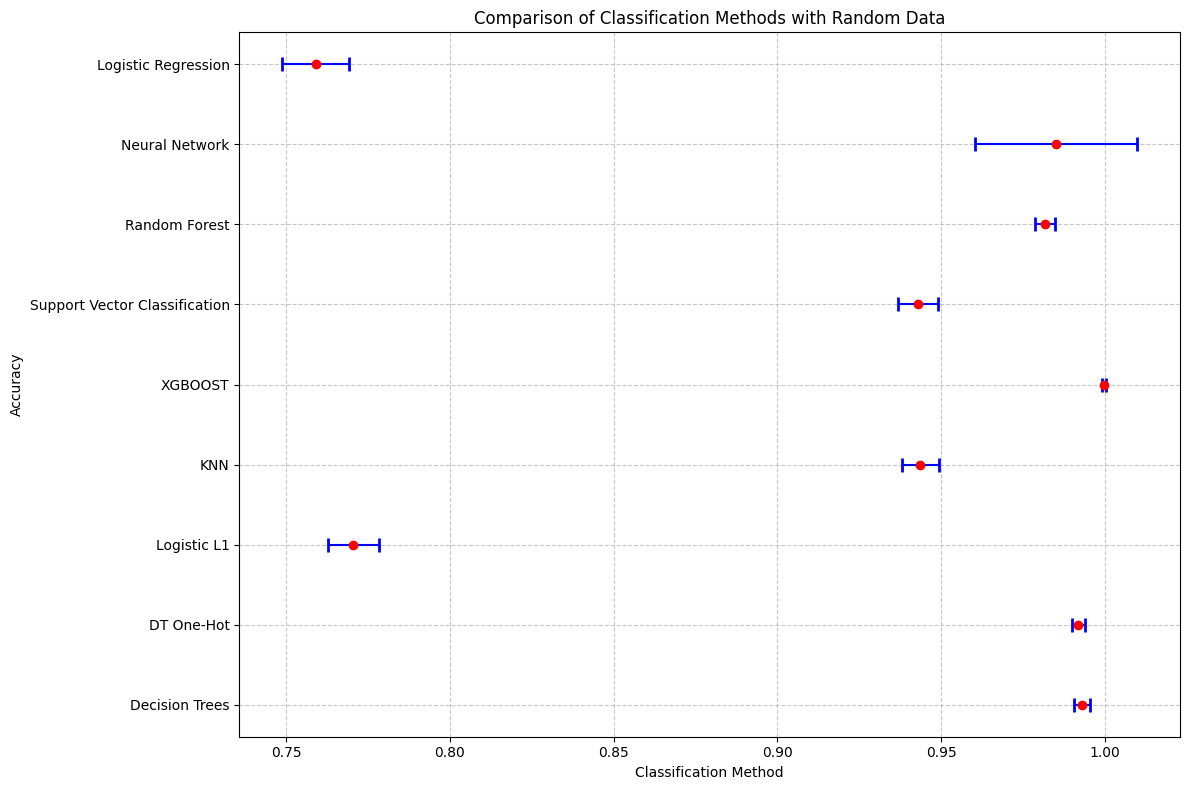

In [43]:
import matplotlib.pyplot as plt
# Create plot
plt.figure(figsize=(12, 8))
plt.errorbar(means, methods,xerr=np.sqrt(variances), fmt='o',
             capsize=5, capthick=2, color='r', ecolor='b')
plt.xlabel('Classification Method')
plt.ylabel('Accuracy')
plt.title('Comparison of Classification Methods with Random Data')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()


# Display plot
plt.show()


# Task - 2

For task 2, we have to do the following:
1. To construct a bipolar_sigmoid(x) using unipolar sigmoid
2. To compare the response of tanh(x) vs bipolar_sigmoid(x)
3. To parametrize previously constructed functions as bipolar_sigmoid(ax), tanh(ax).
4. To see whether can we evaluate the linear range of 'x' for each value of 'a' in bipolar_sigmoid(ax).

## Constructing bipolar_sigmoid using unipolar sigmoid and also comparing tanh(x) vs bipolar_sigmoid(x)

In [44]:
# Define the unipolar sigmoid function
def sigmoid(x):
    """Unipolar sigmoid function."""
    return 1 / (1 + np.exp(-x))


# Define the bipolar sigmoid function using the unipolar sigmoid
def bipolar_sigmoid(x):
    """Bipolar sigmoid function."""
    return 2 * sigmoid(x) - 1


# Define the range of x values
x = np.linspace(-10, 10, 400)


# Calculate bipolar sigmoid and tanh
bipolar_sigmoid_x = bipolar_sigmoid(x)
tanh_x = np.tanh(x)




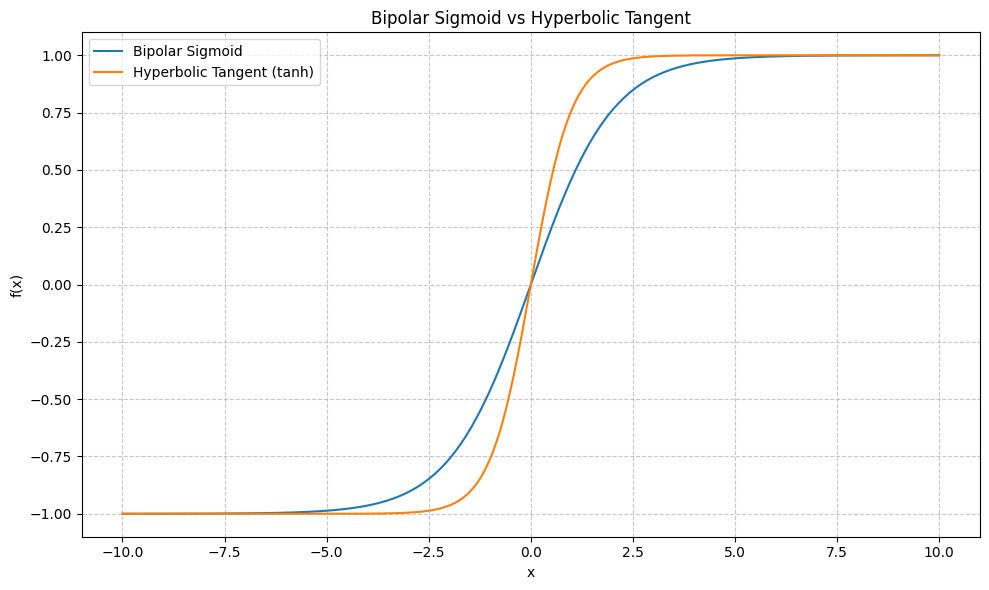

In [45]:
# Create plot
plt.figure(figsize=(10, 6))
plt.plot(x, bipolar_sigmoid_x, label='Bipolar Sigmoid')
plt.plot(x, tanh_x, label='Hyperbolic Tangent (tanh)')
plt.title('Bipolar Sigmoid vs Hyperbolic Tangent')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.tight_layout()

# Display plot
plt.show()

## Parametrizing bipolar_sigmoid and tanh with different values of 'a'

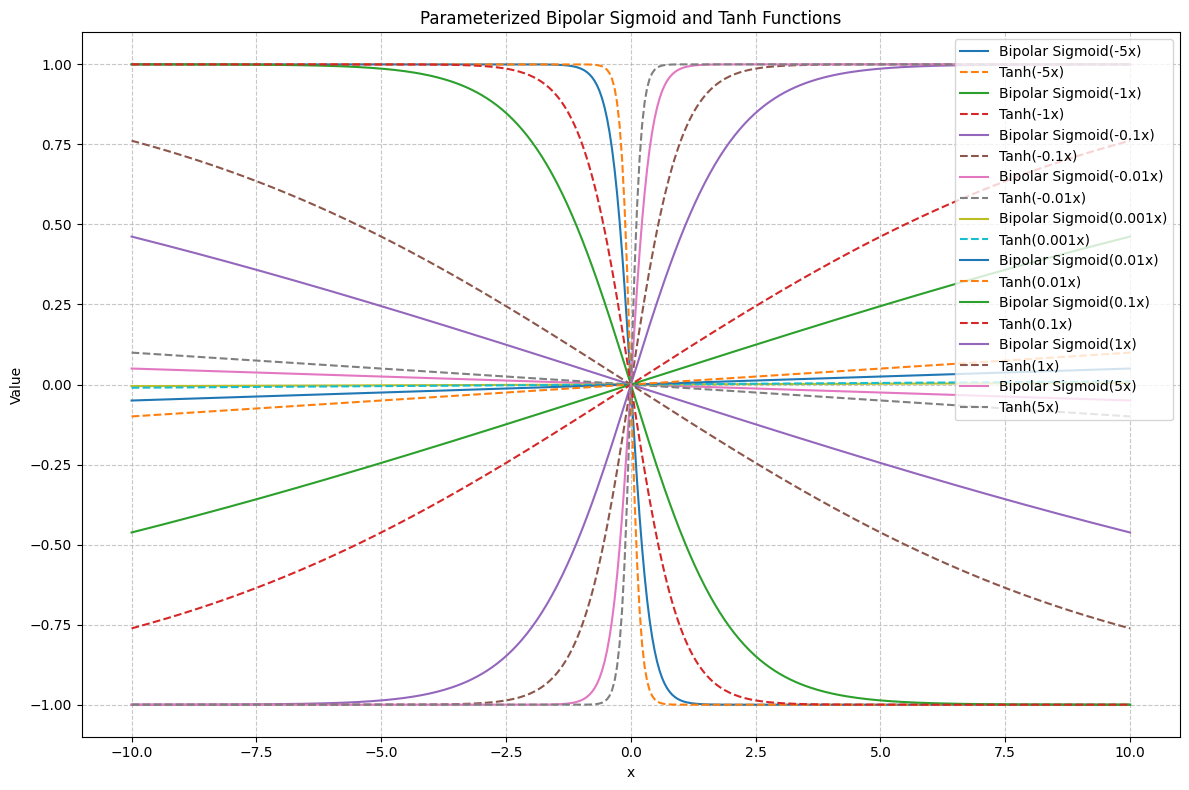

In [46]:
# Parameterized bipolar sigmoid and tanh with different values of 'a'
a_values = [-5, -1, -0.1, -0.01, 0.001, 0.01, 0.1, 1, 5]
x = np.linspace(-10, 10, 400)


# Create plot
plt.figure(figsize=(12, 8))
for a in a_values:
    plt.plot(x, bipolar_sigmoid(a * x), label=f'Bipolar Sigmoid({a}x)')
    plt.plot(x, np.tanh(a * x), label=f'Tanh({a}x)', linestyle='--')

plt.title('Parameterized Bipolar Sigmoid and Tanh Functions')
plt.xlabel('x')
plt.ylabel('Value')
plt.legend(loc='upper right')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()



# Evaluating linear range of 'x' for each value of 'a' in bipolar_sigmoid(ax)

In [47]:
# Evaluate linear range of 'x' for each value of 'a' in bipolar_sigmoid(ax)
def linear_range(a, threshold=0.1):
    """Find linear range of bipolar sigmoid function."""
    x = np.linspace(-10, 10, 400)
    y = bipolar_sigmoid(a * x)
    derivative = np.gradient(y, x)
    linear_range_idx = np.where(np.abs(derivative) < threshold)[0]

    if len(linear_range_idx) > 0:
        return x[linear_range_idx[0]], x[linear_range_idx[-1]]
    return None


print("Linear ranges for different 'a' values:")
for a in a_values:
    lr = linear_range(a)
    if lr:
        print(f"a = {a}: Linear range is approximately between {lr[0]:.2f} and {lr[1]:.2f}")
    else:
        print(f"a = {a}: Linear range is not well-defined")

Linear ranges for different 'a' values:
a = -5: Linear range is approximately between -10.00 and 10.00
a = -1: Linear range is approximately between -10.00 and 10.00
a = -0.1: Linear range is approximately between -10.00 and 10.00
a = -0.01: Linear range is approximately between -10.00 and 10.00
a = 0.001: Linear range is approximately between -10.00 and 10.00
a = 0.01: Linear range is approximately between -10.00 and 10.00
a = 0.1: Linear range is approximately between -10.00 and 10.00
a = 1: Linear range is approximately between -10.00 and 10.00
a = 5: Linear range is approximately between -10.00 and 10.00
